In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import pymc3 as pm

In [2]:
# Import the data 
df = pd.read_csv("nyc-taxi-trip-duration/train.csv")

In [3]:
display(df.shape)
df.head()


(1458644, 11)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
def get_distance_between_points(lat1,lon1,lat2,lon2):
    '''
    This function is used to get the distance between lat1, lon1 and lat2, lon2
    '''
    # approximate radius of earth in km
    R = 6378.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

The coordinates of WALL STREET are 40.70729◦N, 74.01095◦W. 

In [5]:
df['dist_pickup_to_wall_street'] = np.vectorize(get_distance_between_points)(40.70729,-74.01095,df['pickup_latitude'], df['pickup_longitude'])

# Distance pickup to dropoff
df['dist_pickup_to_dropoff'] = np.vectorize(get_distance_between_points)(df['dropoff_latitude'],df['dropoff_longitude'],df['pickup_latitude'], df['pickup_longitude'])

In order to extract the most relevant information from the
dataset for our purpose, we create a filtered dataset, in
which either the pick-up or drop-off location lies within
500 m from Wall Street (indicated by the red oval in Fig.
3(b)). In addition, we filter trips with unrealistically long
durations (>20 000 s).

In [6]:
print("Number of rows taht satisfied the filter above : ",df[( df['dist_pickup_to_wall_street'] <= 0.5)& (df['trip_duration'] < 2000)].shape)



Number of rows taht satisfied the filter above :  (18748, 13)


In [7]:
df_wall = df[( df['dist_pickup_to_wall_street'] <= 0.5)& (df['trip_duration'] < 4000)]

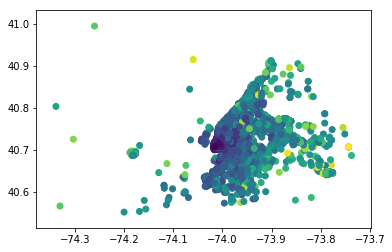

In [8]:
plt.scatter(df_wall['dropoff_longitude'], df_wall['dropoff_latitude'], c=df_wall['trip_duration'])

(array([ 161.,  269.,  428.,  646.,  705.,  903., 1063., 1182., 1227.,
        1331., 1271., 1218., 1198., 1039.,  938.,  834.,  781.,  660.,
         627.,  504.,  419.,  436.,  351.,  286.,  261.,  240.,  187.,
         141.,  149.,  117.,  113.,   91.,   85.,   81.,   62.,   54.,
          44.,   49.,   35.,   32.,   23.,   29.,   22.,   21.,   25.,
          17.,   19.,   13.,   14.,   16.]),
 array([2.00000e+00, 8.17400e+01, 1.61480e+02, 2.41220e+02, 3.20960e+02,
        4.00700e+02, 4.80440e+02, 5.60180e+02, 6.39920e+02, 7.19660e+02,
        7.99400e+02, 8.79140e+02, 9.58880e+02, 1.03862e+03, 1.11836e+03,
        1.19810e+03, 1.27784e+03, 1.35758e+03, 1.43732e+03, 1.51706e+03,
        1.59680e+03, 1.67654e+03, 1.75628e+03, 1.83602e+03, 1.91576e+03,
        1.99550e+03, 2.07524e+03, 2.15498e+03, 2.23472e+03, 2.31446e+03,
        2.39420e+03, 2.47394e+03, 2.55368e+03, 2.63342e+03, 2.71316e+03,
        2.79290e+03, 2.87264e+03, 2.95238e+03, 3.03212e+03, 3.11186e+03,
        3.19160e

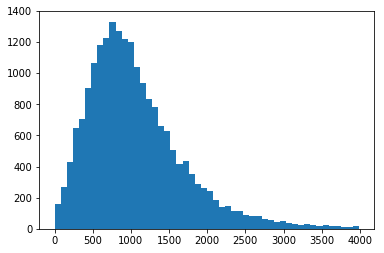

In [9]:
plt.hist(df_wall['trip_duration'],bins=50)

In [10]:
df_wall['trip_duration'].mean()

1063.9749718371945

In [11]:
df_wall['dropoff_datetime'].values[0]

'2016-05-10 19:44:40'

In [12]:
df_wall

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_pickup_to_wall_street,dist_pickup_to_dropoff
32,id3075902,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2,-74.005501,40.706589,-73.985817,40.744202,N,1022,0.466408,4.504228
78,id1818021,1,2016-03-23 00:34:10,2016-03-23 00:45:24,1,-74.011169,40.703606,-74.005692,40.741360,N,674,0.410549,4.228005
113,id0694434,1,2016-01-26 23:40:14,2016-01-26 23:48:39,1,-74.006798,40.706074,-73.974022,40.744076,N,505,0.375631,5.053768
154,id0401226,1,2016-05-26 06:37:10,2016-05-26 06:52:19,4,-74.006706,40.705555,-73.991692,40.749722,N,909,0.406873,5.077028
510,id1638050,1,2016-04-11 23:27:02,2016-04-11 23:38:11,1,-74.009407,40.706123,-73.974632,40.751160,N,669,0.183897,5.808502
584,id0422722,2,2016-05-11 13:49:33,2016-05-11 14:12:31,6,-74.012810,40.708179,-73.984978,40.742088,N,1378,0.185557,4.445305
649,id0153673,2,2016-05-25 08:00:03,2016-05-25 08:10:07,6,-74.007858,40.705296,-74.013481,40.715263,N,604,0.342575,1.206770
814,id2587992,1,2016-06-15 18:34:54,2016-06-15 19:15:46,1,-74.009361,40.709076,-73.949783,40.772617,N,2452,0.239783,8.676426
822,id3602048,1,2016-01-02 09:05:44,2016-01-02 09:21:55,1,-74.007378,40.707905,-73.963364,40.775112,N,971,0.309122,8.351673
833,id0944696,2,2016-06-20 17:25:41,2016-06-20 17:34:40,5,-74.008408,40.707649,-74.005852,40.714710,N,539,0.218233,0.815059


# PyMC3 for Gaussian Process

In [13]:
# ls = [2, 5] # the lengthscales
# cov_func = pm.gp.cov.ExpQuad(input_dim=3, ls=ls, active_dims=[1, 2])

In [14]:
# gp = pm.gp.Latent(mean_func, cov_func)

In [15]:
# cov_func

In [16]:
# # A one dimensional column vector of inputs.
# X = np.linspace(0, 1, 10)[:, None]

# with pm.Model() as model:
#     # Specify the covariance function.
#     cov_func = pm.gp.cov.ExpQuad(1, ls=0.1)

#     # Specify the GP.  The default mean function is `Zero`.
#     gp = pm.gp.Latent(cov_func=cov_func)

#     # Place a GP prior over the function f.
#     f = gp.prior("f", X=X)



# # After fitting or sampling, specify the distribution
# # at new points with .conditional
# Xnew = np.linspace(-1, 2, 50)[:, None]

# with model:
#     fcond = gp.conditional("fcond", Xnew=Xnew)

In [ ]:
X

In [17]:
# plt.plot(X)
# plt.plot(Xnew)

In [18]:
# pm.model()

In [ ]:
len(list(df_wall['dropoff_latitude'][:10]))

In [ ]:
# plt.contour(df_wall['dropoff_latitude'], df_wall['dropoff_longitude'], df_wall['trip_duration'], colors='black');
def f(x, y):
    return x*y
x = list(df_wall['dropoff_longitude'][:30])
y = list(df_wall['dropoff_latitude'][:0])

X, Y = np.meshgrid([1]*30, list(df_wall['trip_duration'][:30]))
# X, Y = np.meshgrid(x,y)
Z = f(X, Y)

In [ ]:
Z

In [ ]:
plt.contourf( Z, 10);


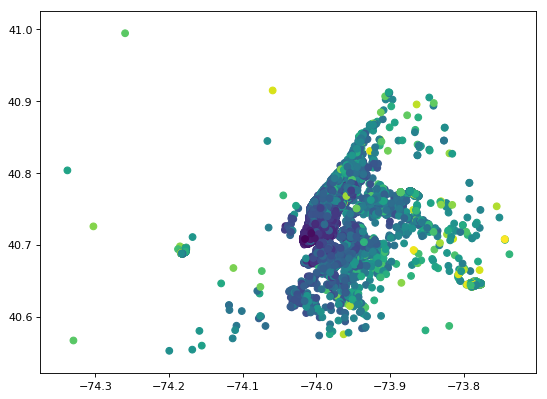

In [19]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(list(df_wall['dropoff_longitude']),list(df_wall['dropoff_latitude']), c=list(df_wall['trip_duration']))




In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [20]:
import plotly.plotly as py
import plotly.graph_objs as go

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2678add8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c267994a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2678a9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c26799b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c26799e80>],
 'means': []}

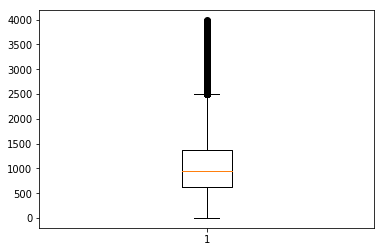

In [21]:
plt.boxplot(df_wall['trip_duration'])

In [22]:
# trace = go.Scatter(
#     x = df_wall['dropoff_longitude'],
#     y = df_wall['dropoff_latitude'],
#     mode='markers',
#     marker=dict(
#         size=3,
#         color = df_wall['dist_pickup_to_dropoff'],
#         colorscale='Jet',
#         showscale=True
#     )
# )
# data = [trace]
# py.iplot(data, filename='basic-scatter')

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [23]:
# trace = go.Scatter(
#     x = df_wall['dropoff_longitude'],
#     y = df_wall['dropoff_latitude'],
#     mode='markers',
#     marker=dict(
#         size=3,
#         color = df_wall['trip_duration'],
#         colorscale='Jet',
#         showscale=True
#     )
# )
# data = [trace]
# py.iplot(data, filename='basic-scatter')

In [24]:
corr = df_wall.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_pickup_to_wall_street,dist_pickup_to_dropoff
vendor_id,1,0.27,0.0028,-0.029,0.0011,0.012,0.0051,0.007,0.013
passenger_count,0.27,1,-0.01,0.0044,-0.008,0.0025,0.0085,0.00038,-0.0028
pickup_longitude,0.0028,-0.01,1,-0.12,0.062,0.0097,-0.0063,0.043,0.0054
pickup_latitude,-0.029,0.0044,-0.12,1,-0.023,0.012,-0.029,-0.064,-0.039
dropoff_longitude,0.0011,-0.008,0.062,-0.023,1,0.14,0.49,0.0061,0.69
dropoff_latitude,0.012,0.0025,0.0097,0.012,0.14,1,0.26,0.0022,0.32
trip_duration,0.0051,0.0085,-0.0063,-0.029,0.49,0.26,1,-0.024,0.72
dist_pickup_to_wall_street,0.007,0.00038,0.043,-0.064,0.0061,0.0022,-0.024,1,0.0012
dist_pickup_to_dropoff,0.013,-0.0028,0.0054,-0.039,0.69,0.32,0.72,0.0012,1


In [25]:
df_wall['dropoff_time'] = df_wall['dropoff_datetime'].str.split(' ', expand=True)[1]

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [26]:
df_wall['dropoff_hour'] = df_wall['dropoff_time'].str.split(':', expand=True)[0]

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [27]:
df_wall['dropoff_hour'] = df_wall['dropoff_hour'].astype(str).astype(int)

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [28]:
# df_wall['trip_duration_category'] = np.vectorize(category_duration)(df_wall['trip_duration'])

NameError: name 'category_duration' is not defined

In [ ]:
# len(df_wall["trip_duration"])

In [ ]:
# # Data Preparation
# import torch.nn as nn
# import torch.utils.data
# trainSize = int(0.75 * len(df_wall))
# # testSize = len(df_wall) - trainSize
# target = df_wall["trip_duration"]
# # dropped = df_hist.drop("Sales", axis=1)
# dropped = df_wall[['dropoff_latitude','dropoff_longitude','dist_pickup_to_dropoff','dropoff_hour']]

# targets = torch.tensor(target.values).float()
# targets = targets.resize_((len(df_wall["trip_duration"]),1))
# inputs = torch.tensor(dropped.values).float()


# from torch.utils.data import TensorDataset, DataLoader
# # Define dataset
# train_ds = TensorDataset(inputs, targets)

# # Define Data Loader
# print("Train size :",trainSize)
# batch_size = trainSize
# train_dl = DataLoader(train_ds, batch_size, shuffle=True)
# series_dl = (next(iter(train_dl)))

# # # Convert torch to ndarray
# # x_train = series_dl[0].numpy()
# # y_train = series_dl[1].numpy()

# model = nn.Linear(dropped.shape[1], 1)
# print("Weight :" ,model.weight)
# print("Bias :" ,model.bias)

# # Define optimizer
# opt = torch.optim.SGD(model.parameters(), lr=1e-5)

# # Import nn.functional
# import torch.nn.functional as F



# # Define loss function
# loss_fn = F.mse_loss
# loss = loss_fn(model(inputs), targets)


# # Define a utility function to train the model
# def fit(num_epochs, model, loss_fn, opt):
#     for epoch in range(num_epochs):
#         for xb,yb in train_dl:
#             # Generate predictions
#             pred = model(xb)
            
#             # Calculate Loss
#             loss = loss_fn(pred, yb)
# #             print(loss)
#             # Perform gradient descent
#             loss.backward()
#             opt.step()
#             opt.zero_grad()
# #         print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1,num_epochs, loss))
#     print('Training loss: ', loss_fn(model(inputs), targets))
    
# # Train the model for 100 epochs
# print(fit(100, model, loss_fn, opt))

In [ ]:
# preds = model(inputs)

In [ ]:
# pred= preds.detach().numpy()

In [ ]:
# idx = []
# for i in range(len(pred)):
#     idx.append(pred[i][0])

In [ ]:
# df_wall['predicted_val']= idx

In [ ]:
# d = {'Truth' : df_wall['trip_duration'],
#      'Prediction' : df_wall['predicted_val']}
# df = pd.DataFrame(d)
# df.plot(style=['o','rx'])

In [ ]:
# plt.boxplot(df_wall['predicted_val'])

In [30]:
temp_df = df_wall[['dropoff_latitude','dropoff_longitude','dist_pickup_to_dropoff','dropoff_hour','trip_duration']]

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split
experiments = {"Algorithm":["Ordinary Least Squares", "Regression Tree", 
                            "Big Random Forest", "Random Forest", 
                            "Bagging"], 
               "Objects" : [lambda : LinearRegression(), 
                            lambda : DecisionTreeRegressor(), 
                            lambda : RandomForestRegressor(n_estimators=100), 
                            lambda : RandomForestRegressor(), 
                            lambda : BaggingRegressor()], 
               "Predictions":[[] for _ in range(5)]}
actuals = []

In [35]:
for _ in range (4):
    train_X, test_X, train_y, test_y = (
        train_test_split(temp_df.drop("trip_duration", axis=1), 
                         temp_df["trip_duration"], test_size=0.33))
    for i, obj_factory in enumerate(experiments["Objects"]):
        obj = obj_factory()
        obj.fit(y=train_y,X=train_X)
        experiments["Predictions"][i] += list(obj.predict(test_X))
    actuals += list(test_y)
actuals = pd.Series(actuals)
experiments["Predictions"] = list(map(pd.Series, experiments["Predictions"]))

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [36]:
experiments["Results"] = []
for o in experiments["Objects"]:
    experiments["Results"].append(
        model_selection.cross_val_score(o(), y=temp_df['trip_duration'], 
                                        X=temp_df.drop("trip_duration", axis=1),
                                        cv=5).mean())

pd.DataFrame(experiments).drop(["Objects", "Predictions"], 
                            axis=1).set_index("Algorithm")

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Results
Algorithm,
Ordinary Least Squares,0.523634
Regression Tree,0.355627
Big Random Forest,0.655625
Random Forest,0.628567
Bagging,0.627523


# Big Random Forest

In [37]:
train_X, test_X, train_y, test_y = ( train_test_split(temp_df.drop("trip_duration", axis=1), 
                         temp_df["trip_duration"], test_size=0.33))

obj = RandomForestRegressor(n_estimators=100)
obj.fit(y=train_y,X=train_X)
obj.predict(test_X)



array([ 659.86, 1497.93, 3225.59, ...,  790.22, 1351.78,  619.74])

In [38]:
model_selection.cross_val_score(obj, y=temp_df['trip_duration'], 
                                        X=temp_df.drop("trip_duration", axis=1),
                                        cv=5).mean()

0.653937124048162

In [39]:
temp_df

,dropoff_latitude,dropoff_longitude,dist_pickup_to_dropoff,dropoff_hour,trip_duration
32,40.744202,-73.985817,4.504228,19,1022
78,40.741360,-74.005692,4.228005,0,674
113,40.744076,-73.974022,5.053768,23,505
154,40.749722,-73.991692,5.077028,6,909
510,40.751160,-73.974632,5.808502,23,669
584,40.742088,-73.984978,4.445305,14,1378
649,40.715263,-74.013481,1.206770,8,604
814,40.772617,-73.949783,8.676426,19,2452
822,40.775112,-73.963364,8.351673,9,971
833,40.714710,-74.005852,0.815059,17,539


In [40]:
temp_df['trip_duration_prediction'] = obj.predict(temp_df.drop("trip_duration", axis=1))

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



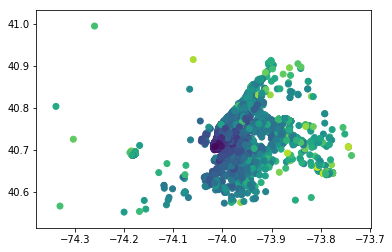

In [41]:
plt.scatter(temp_df['dropoff_longitude'], temp_df['dropoff_latitude'], c=temp_df['trip_duration_prediction'])

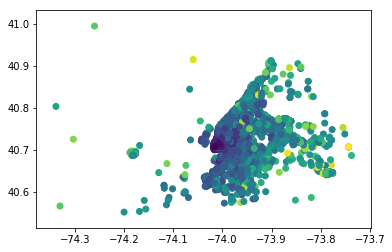

In [42]:
plt.scatter(temp_df['dropoff_longitude'], temp_df['dropoff_latitude'], c=temp_df['trip_duration'])

In [43]:
# temp_df.describe()
# Latitude : 40.552521 - 40.994392
# Longitude : -74.338089 - -73.737846

get_distance_between_points(40.552521,-74.338089 ,40.552521, -73.737846 )

50.76838348268056

In [44]:
sample_lat = []
for i in range(40):
    sample_lat.append(i*0.01 + 40.5)

sample_lng = []
for i in range(60):
    sample_lng.append(i*0.01 -74.3)

In [45]:
temp2_list = []
for i in sample_lat:
    temp1_list = []
    for j in sample_lng:
        temp1_list.append(get_distance_between_points(40.70729,-74.01095,i,j))
    temp2_list.append(temp1_list)

In [46]:
temp2_list

[[33.60405067474811,
  32.99475732386108,
  32.39605460557035,
  31.80854054646349,
  31.232846562775805,
  30.669638286571956,
  30.11961614615152,
  29.583515635103343,
  29.062107195879936,
  28.556195635680496,
  28.066618985263418,
  27.594246705870823,
  27.139977146712035,
  26.704734156393,
  26.289462757641918,
  25.89512380687806,
  25.52268757974836,
  25.173126251861355,
  24.84740528100261,
  24.546473743134165,
  24.27125372855458,
  24.022628964629714,
  23.801432894395894,
  23.60843650170216,
  23.444336228089853,
  23.309742368557597,
  23.205168356952285,
  23.131021352210457,
  23.087594510875146,
  23.075061278508695,
  23.093471954838183,
  23.142752689633276,
  23.222706955723574,
  23.333019431156536,
  23.47326211367349,
  23.642902396156,
  23.84131275837093,
  24.06778168258406,
  24.321525379966708,
  24.601699919875294,
  24.907413381587876,
  25.237737692872216,
  25.591719876019063,
  25.968392484025003,
  26.366783072245394,
  26.785922609965272,
  27.22